<a href="https://colab.research.google.com/github/Meerdjah/ElektrifikasiMirza/blob/main/ElektrifikasiChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

!pip install kmodes
from kmodes.kmodes import KModes

Import Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank/bank-full.csv", sep=';')
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


Filtering Data

1. age
2. job
3. marital
4. education
5. default
6. housing
7. loan
8. balance

In [ ]:
df = df[["age", "job", "marital", "education", "default", "housing", "loan", "balance"]]
df.head(30)

,age,job,marital,education,default,housing,loan,balance
0,58,management,married,tertiary,no,yes,no,2143
1,44,technician,single,secondary,no,yes,no,29
2,33,entrepreneur,married,secondary,no,yes,yes,2
3,47,blue-collar,married,unknown,no,yes,no,1506
4,33,unknown,single,unknown,no,no,no,1
5,35,management,married,tertiary,no,yes,no,231
6,28,management,single,tertiary,no,yes,yes,447
7,42,entrepreneur,divorced,tertiary,yes,yes,no,2
8,58,retired,married,primary,no,yes,no,121
9,43,technician,single,secondary,no,yes,no,593


check for duplicates

In [ ]:
print("columns: ", df.shape[1])
print("rows: ", df.shape[0])
df.duplicated().sum()

columns:  8
rows:  45211


4163

Drop duplicates and check again

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

check for null

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
balance,0


Check data types

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
balance,int64


Convert Datatypes and check again




In [ ]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in cat_cols:
    df[col] = df[col].astype('category')

df.dtypes

,0
age,int64
job,category
marital,category
education,category
default,category
housing,category
loan,category
balance,int64


Convert age into categorical

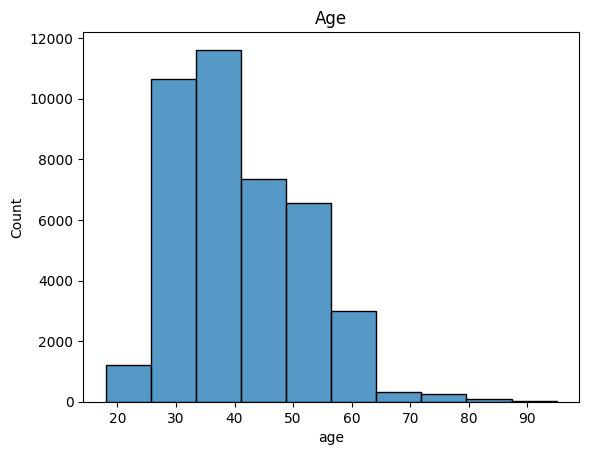

In [ ]:
sns.histplot(data=df,
             x='age',
             bins=10 # 10 because why not
             )


plt.title("Age")

plt.ylabel('Count')

plt.show()

Same again for Balance

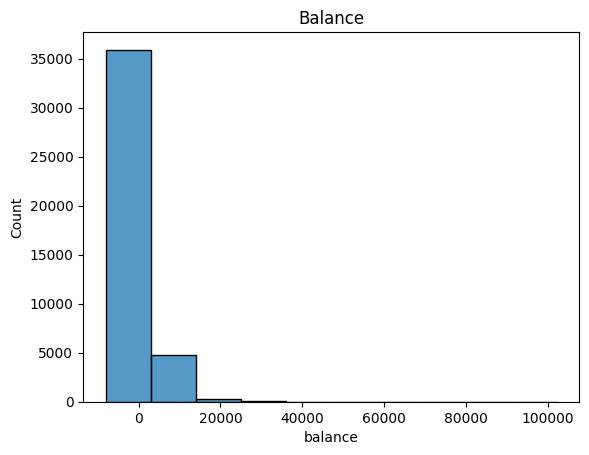

In [ ]:
sns.histplot(data=df,
             x='balance',
             bins= 10 # 10 because i dont quite understand what to do with negatives
             )

plt.title("Balance")

plt.ylabel('Count')

plt.show()

Copy to keep database safe

In [ ]:
data_kmodes = df.copy()

data_kmodes.head()

,age,job,marital,education,default,housing,loan,balance
0,58,management,married,tertiary,no,yes,no,2143
1,44,technician,single,secondary,no,yes,no,29
2,33,entrepreneur,married,secondary,no,yes,yes,2
3,47,blue-collar,married,unknown,no,yes,no,1506
4,33,unknown,single,unknown,no,no,no,1


Binning age and balance

In [ ]:
data_kmodes['age_binned'] = pd.cut(data_kmodes['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).astype('category')
data_kmodes['balance_binned'] = pd.cut(data_kmodes['balance'], bins=[-500, - 250 , 0, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]).astype('category')

data_kmodes.head()

,age,job,marital,education,default,housing,loan,balance,age_binned,balance_binned
0,58,management,married,tertiary,no,yes,no,2143,"(50, 60]","(2000, 2500]"
1,44,technician,single,secondary,no,yes,no,29,"(40, 50]","(0, 250]"
2,33,entrepreneur,married,secondary,no,yes,yes,2,"(30, 40]","(0, 250]"
3,47,blue-collar,married,unknown,no,yes,no,1506,"(40, 50]","(1500, 2000]"
4,33,unknown,single,unknown,no,no,no,1,"(30, 40]","(0, 250]"


Shedding weight

In [ ]:
data_kmodes.drop('age', axis=1, inplace=True)
data_kmodes.drop('balance', axis=1, inplace=True)

In [ ]:
data_kmodes.dtypes

,0
job,category
marital,category
education,category
default,category
housing,category
loan,category
age_binned,category
balance_binned,category


One-Hot Encoding

In [ ]:
data_kmodes = pd.get_dummies(data_kmodes, drop_first=True)
data_kmodes.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,"balance_binned_(-250, 0]","balance_binned_(0, 250]","balance_binned_(250, 500]","balance_binned_(500, 1000]","balance_binned_(1000, 1500]","balance_binned_(1500, 2000]","balance_binned_(2000, 2500]","balance_binned_(2500, 3000]","balance_binned_(3000, 3500]","balance_binned_(3500, 4000]"
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


Algorithm Time

In [ ]:
n_clusters = list(range(2, 9))
costs = []

for n in n_clusters:
    kmodes = KModes(n_clusters=n, init='random', n_init=10, max_iter=500, random_state=42)
    kmodes.fit(data_kmodes)
    cost = kmodes.cost_
    costs.append(cost)

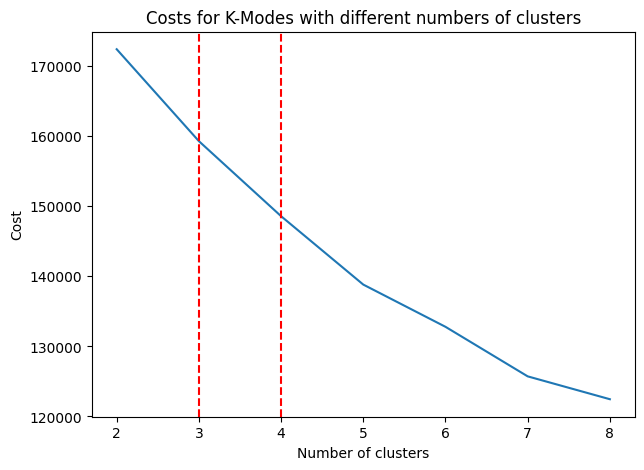

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(n_clusters, costs)
plt.axvline(3, linestyle='--', c='r')
plt.axvline(4, linestyle='--', c='r')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Costs for K-Modes with different numbers of clusters')
plt.show()

In [ ]:
kmodes = KModes(n_clusters=4, init='random', n_init=10, max_iter=500, random_state=42)
df['cluster_k-modes'] = kmodes.fit_predict(data_kmodes)

Data Exploration

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

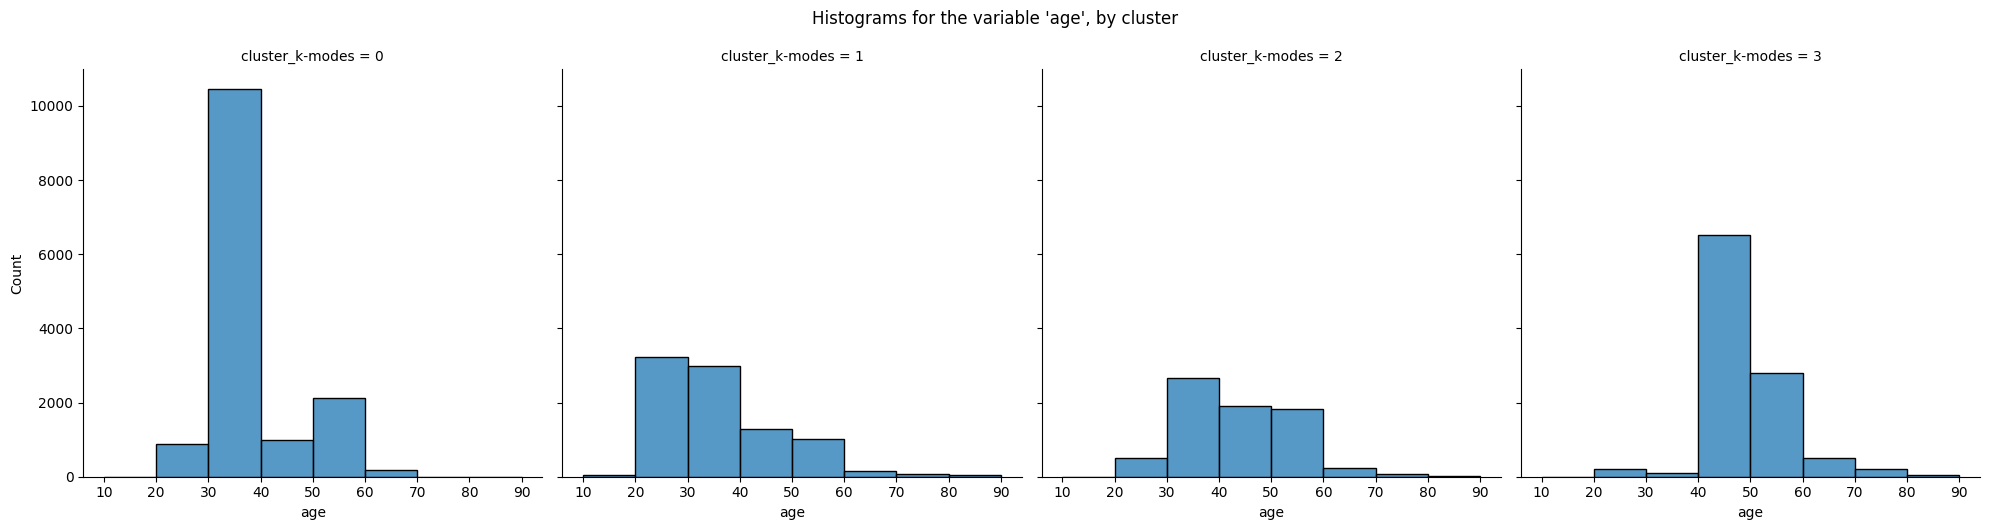

In [ ]:
#age

g = sns.displot(data=df,
                x='age',
                col='cluster_k-modes',
                bins=[10, 20, 30, 40, 50, 60, 70, 80, 90]
                )

g.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

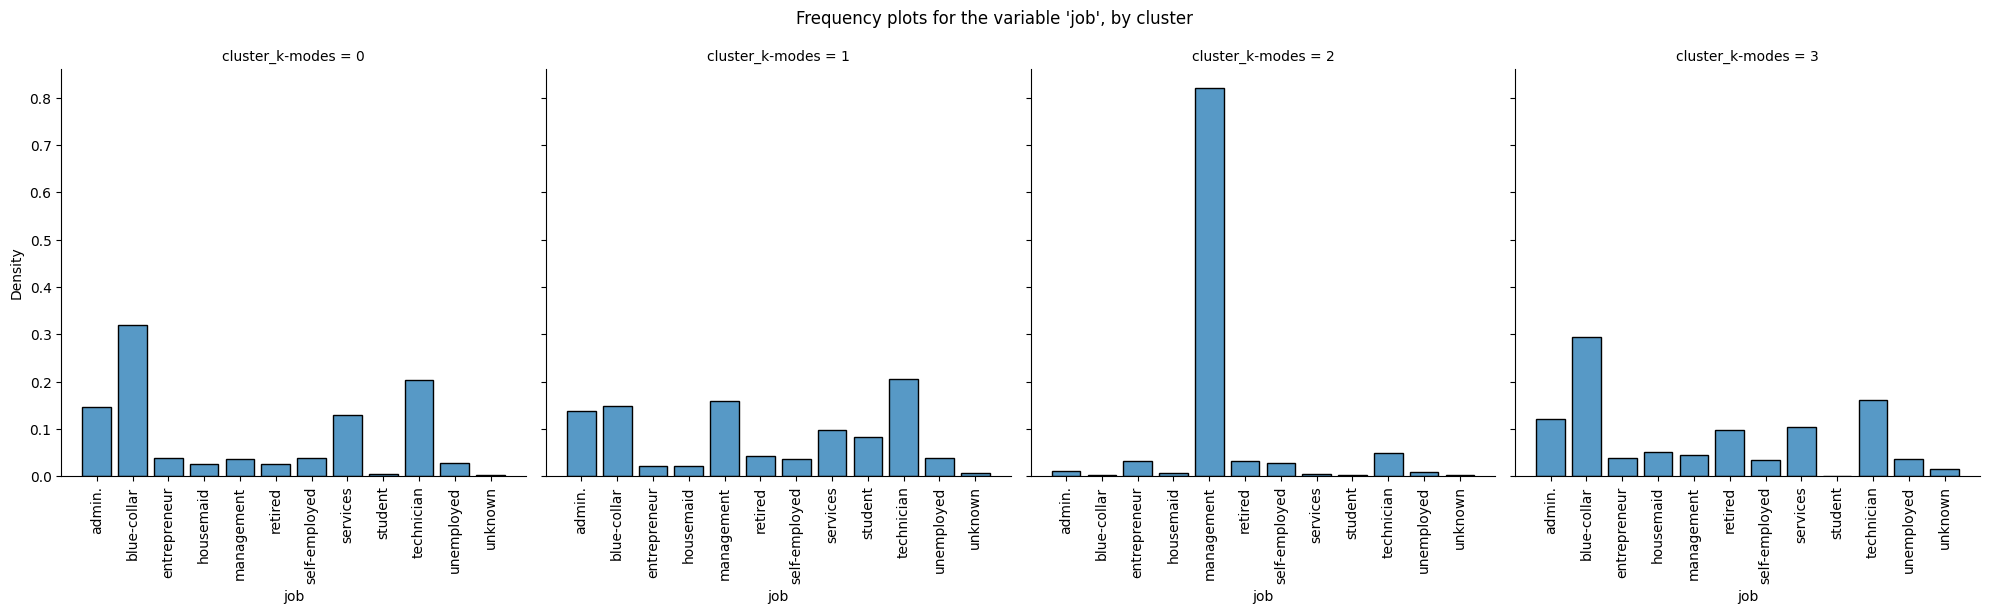

In [ ]:
# Job
g = sns.displot(data=df,
                x='job',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xticklabels(rotation=90)

g.fig.suptitle("Frequency plots for the variable 'job', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

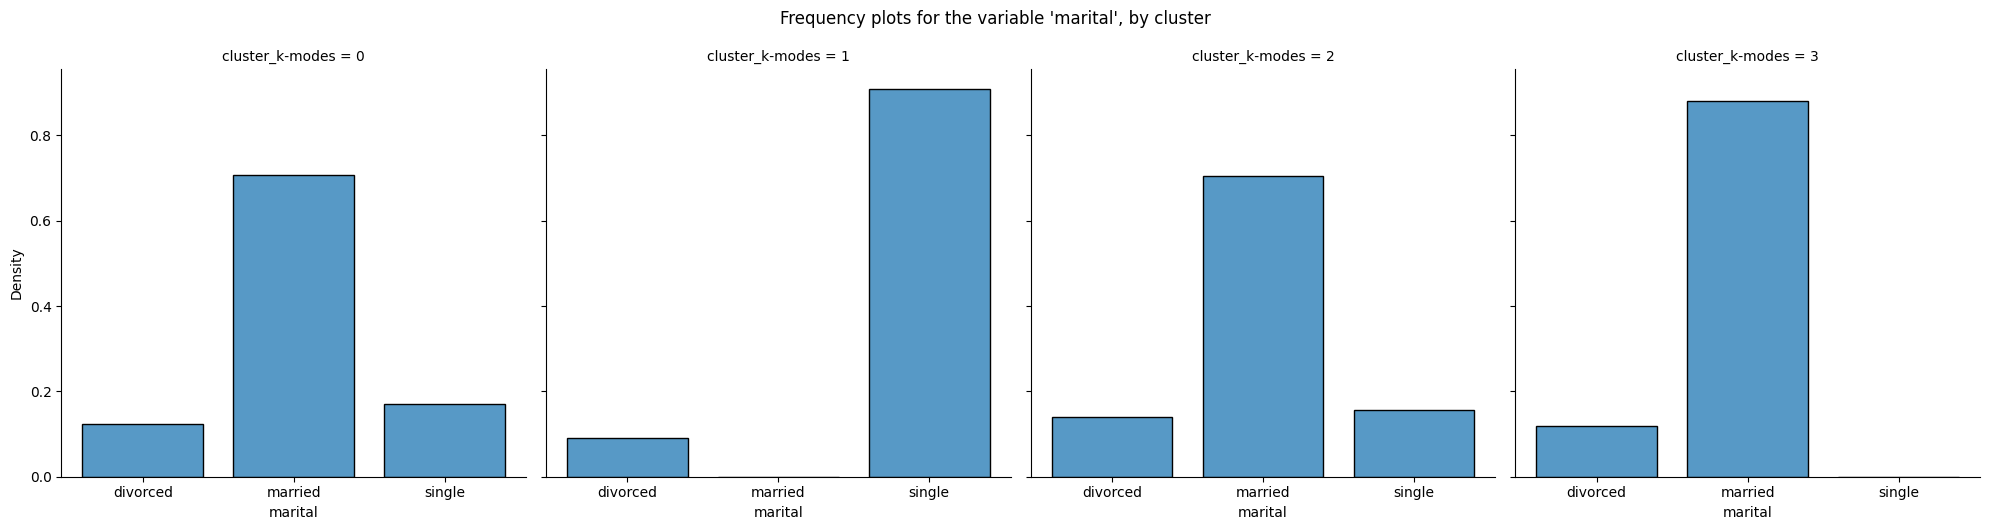

In [ ]:
# Marital
g = sns.displot(data=df,
                x='marital',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'marital', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

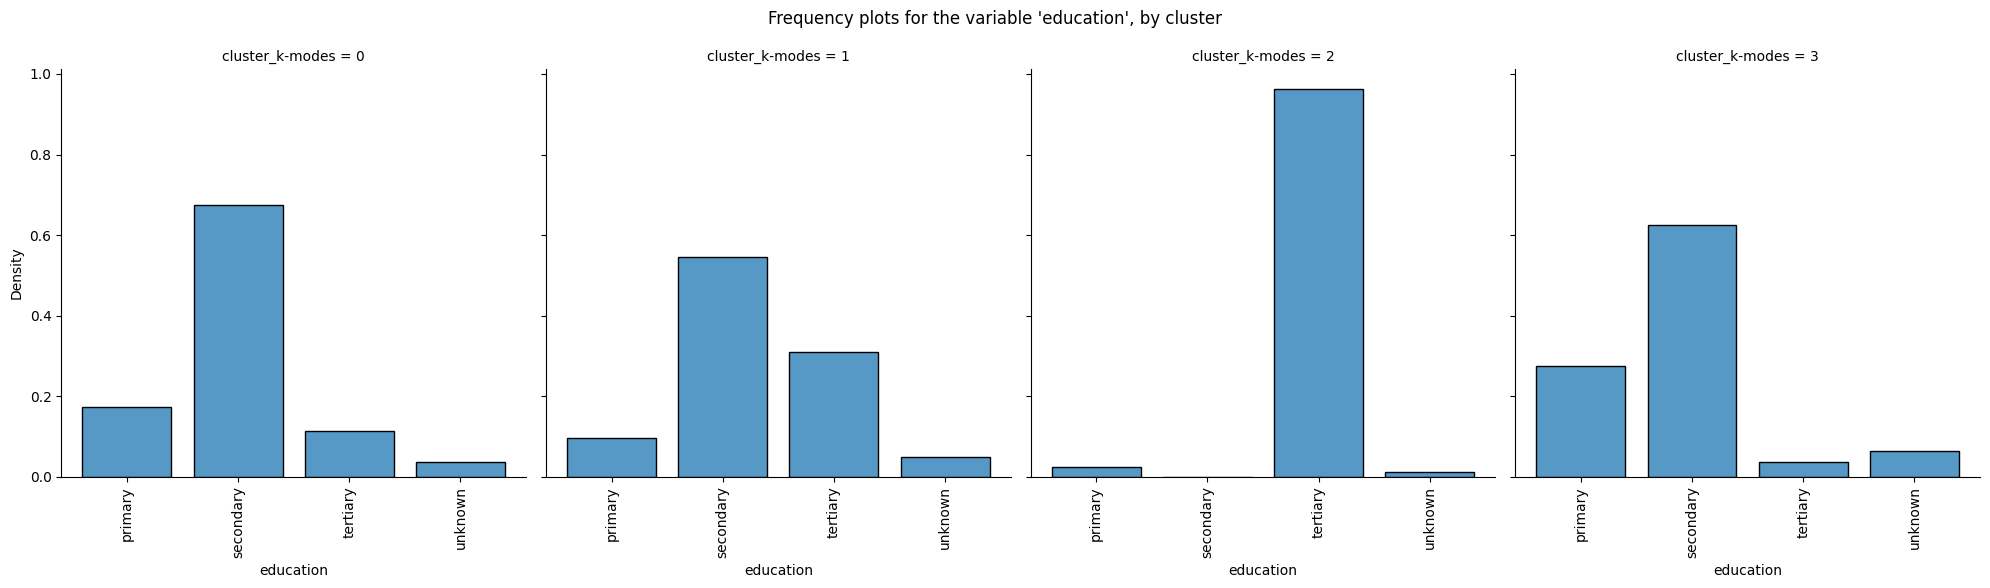

In [ ]:
# Education
g = sns.displot(data=df,
                x='education',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xticklabels(rotation=90)

g.fig.suptitle("Frequency plots for the variable 'education', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

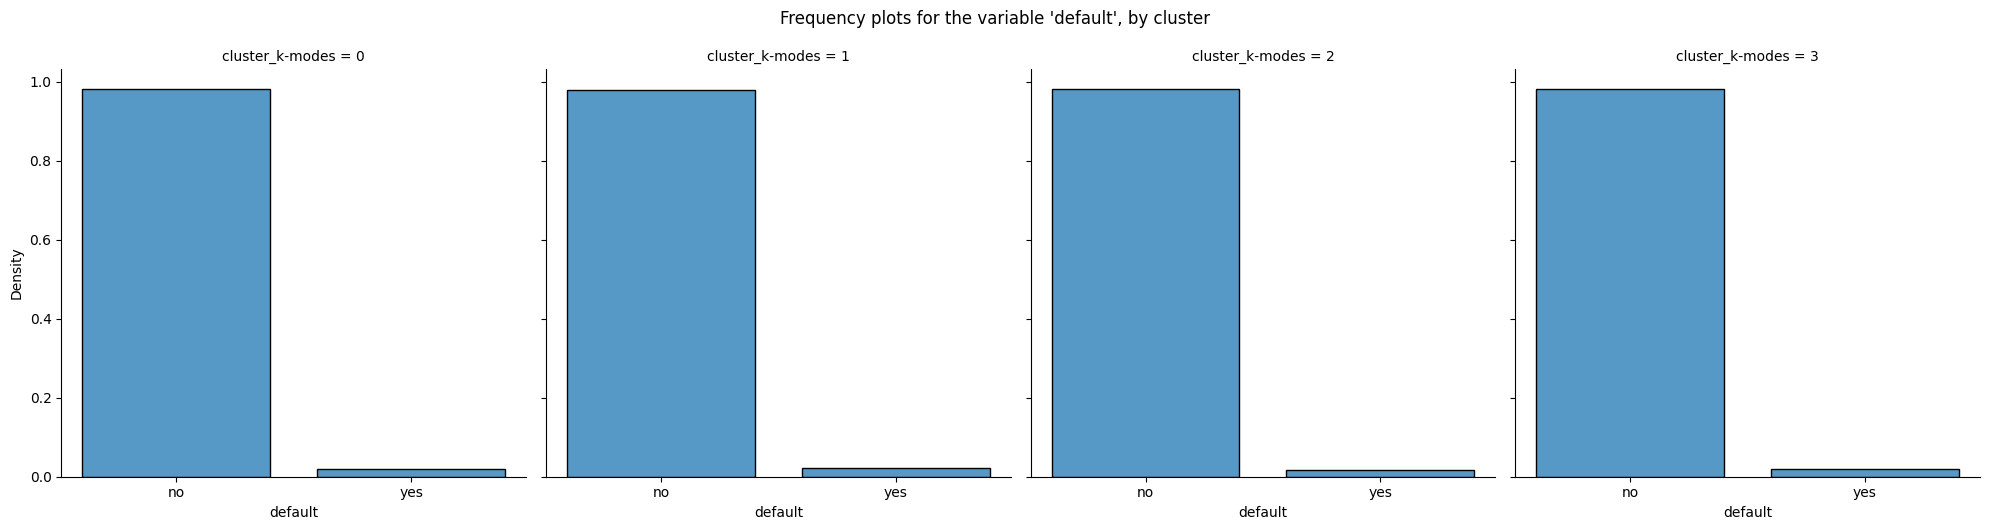

In [ ]:
# Default
g = sns.displot(data=df,
                x='default',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'default', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

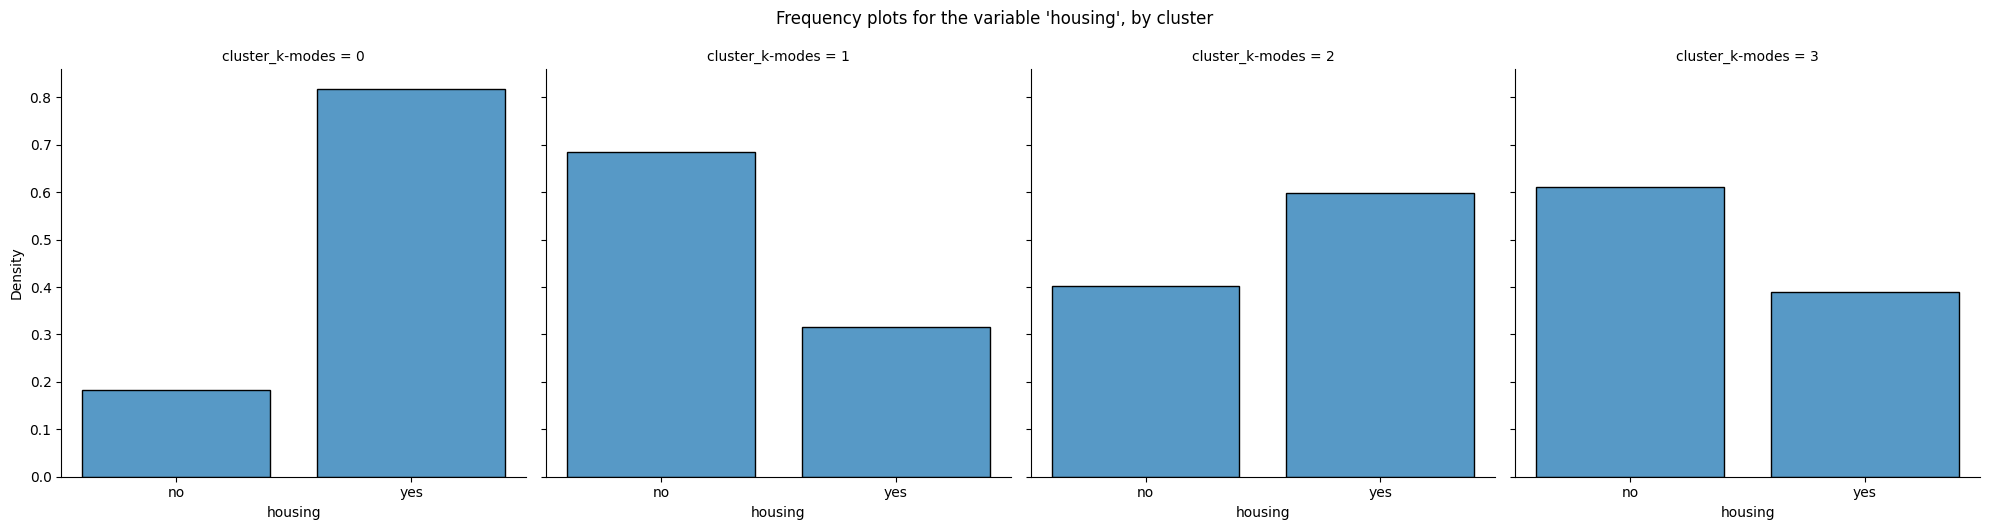

In [ ]:
# Housing
g = sns.displot(data=df,
                x='housing',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'housing', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

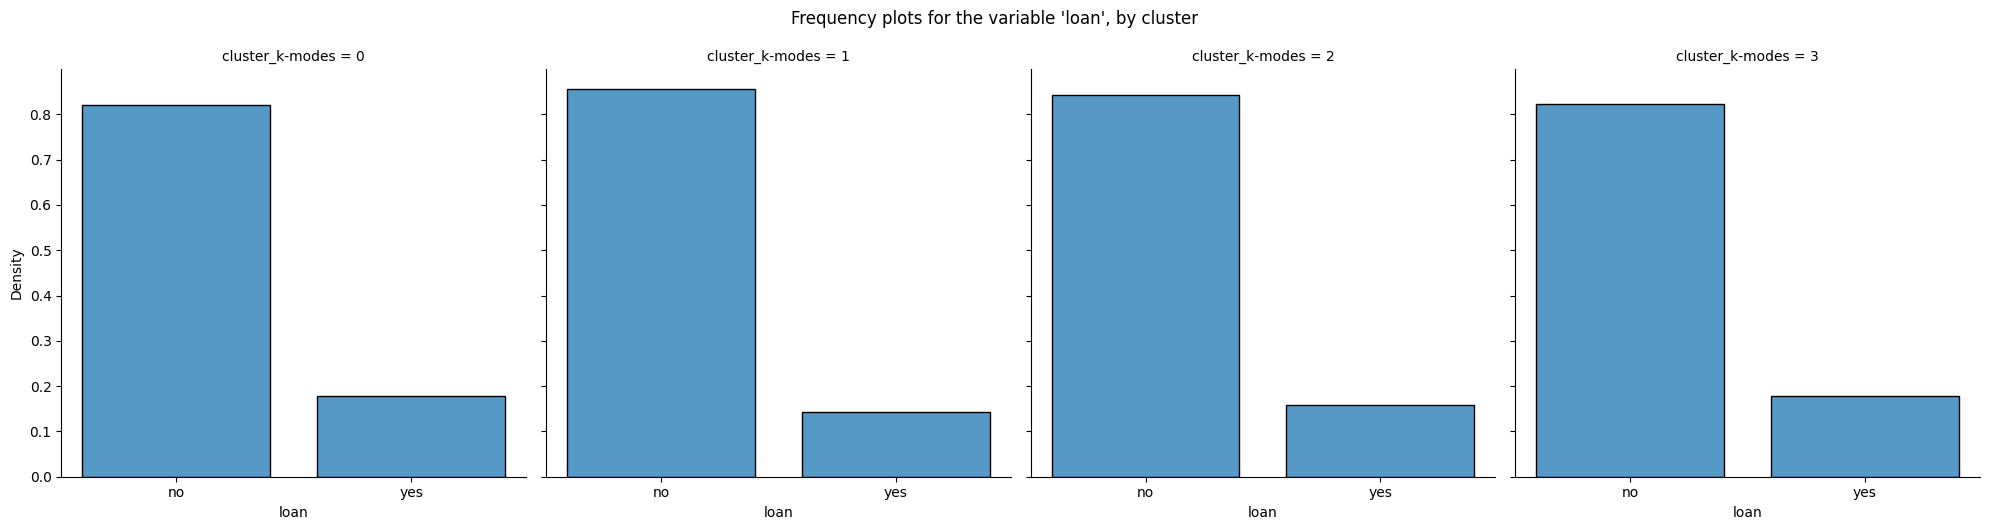

In [ ]:
# Loan
g = sns.displot(data=df,
                x='loan',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'loan', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

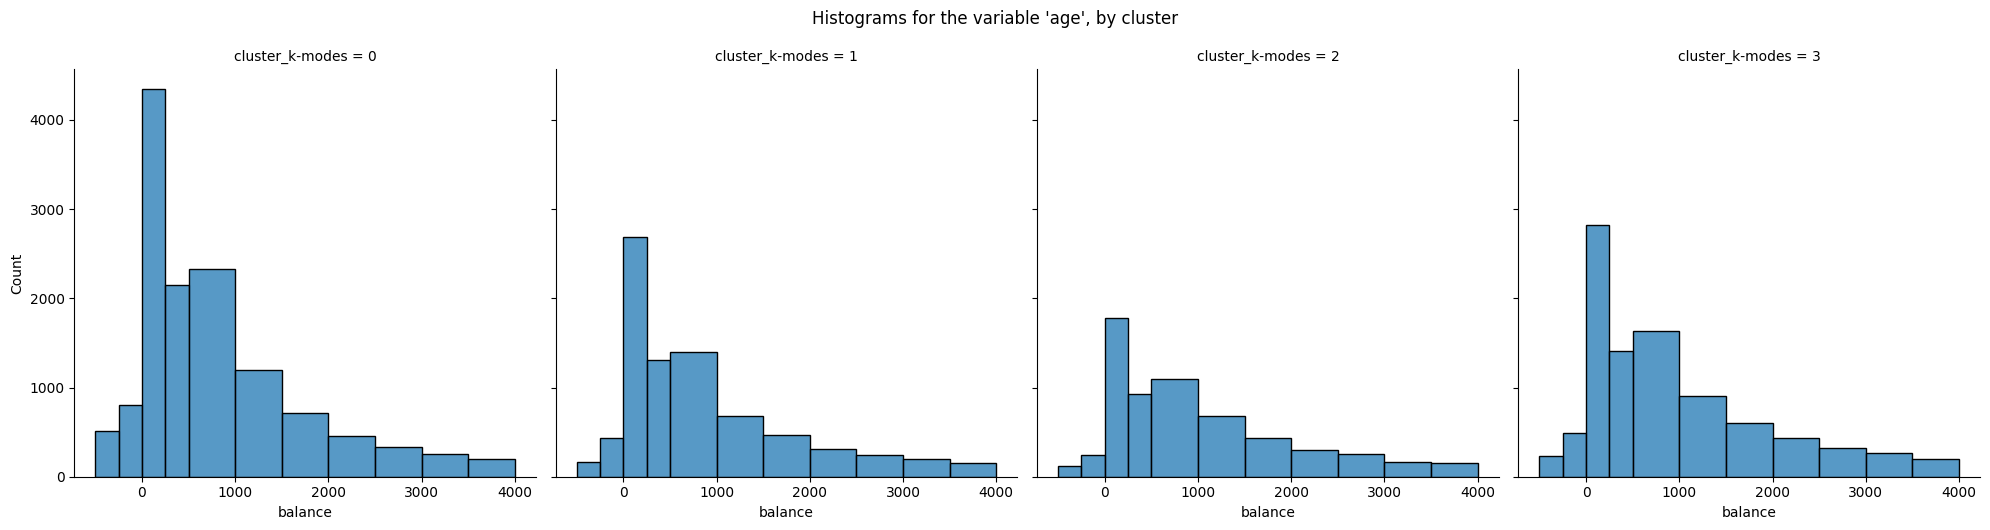

In [ ]:
#balance

g = sns.displot(data=df,
                x='balance',
                col='cluster_k-modes',
                bins=[-500, - 250 , 0, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
                )

g.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)

plt.show()